# Predicting student dropout using Machine Learning

AUTHOR - SEHAJ MALHOTRA - https://www.linkedin.com/in/sehajmalhotra/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [7]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [8]:
data.duplicated().sum()

0

In [9]:
# finding correlations between attributes
# Computing the correlation matrix
corr = data.corr(numeric_only=True)

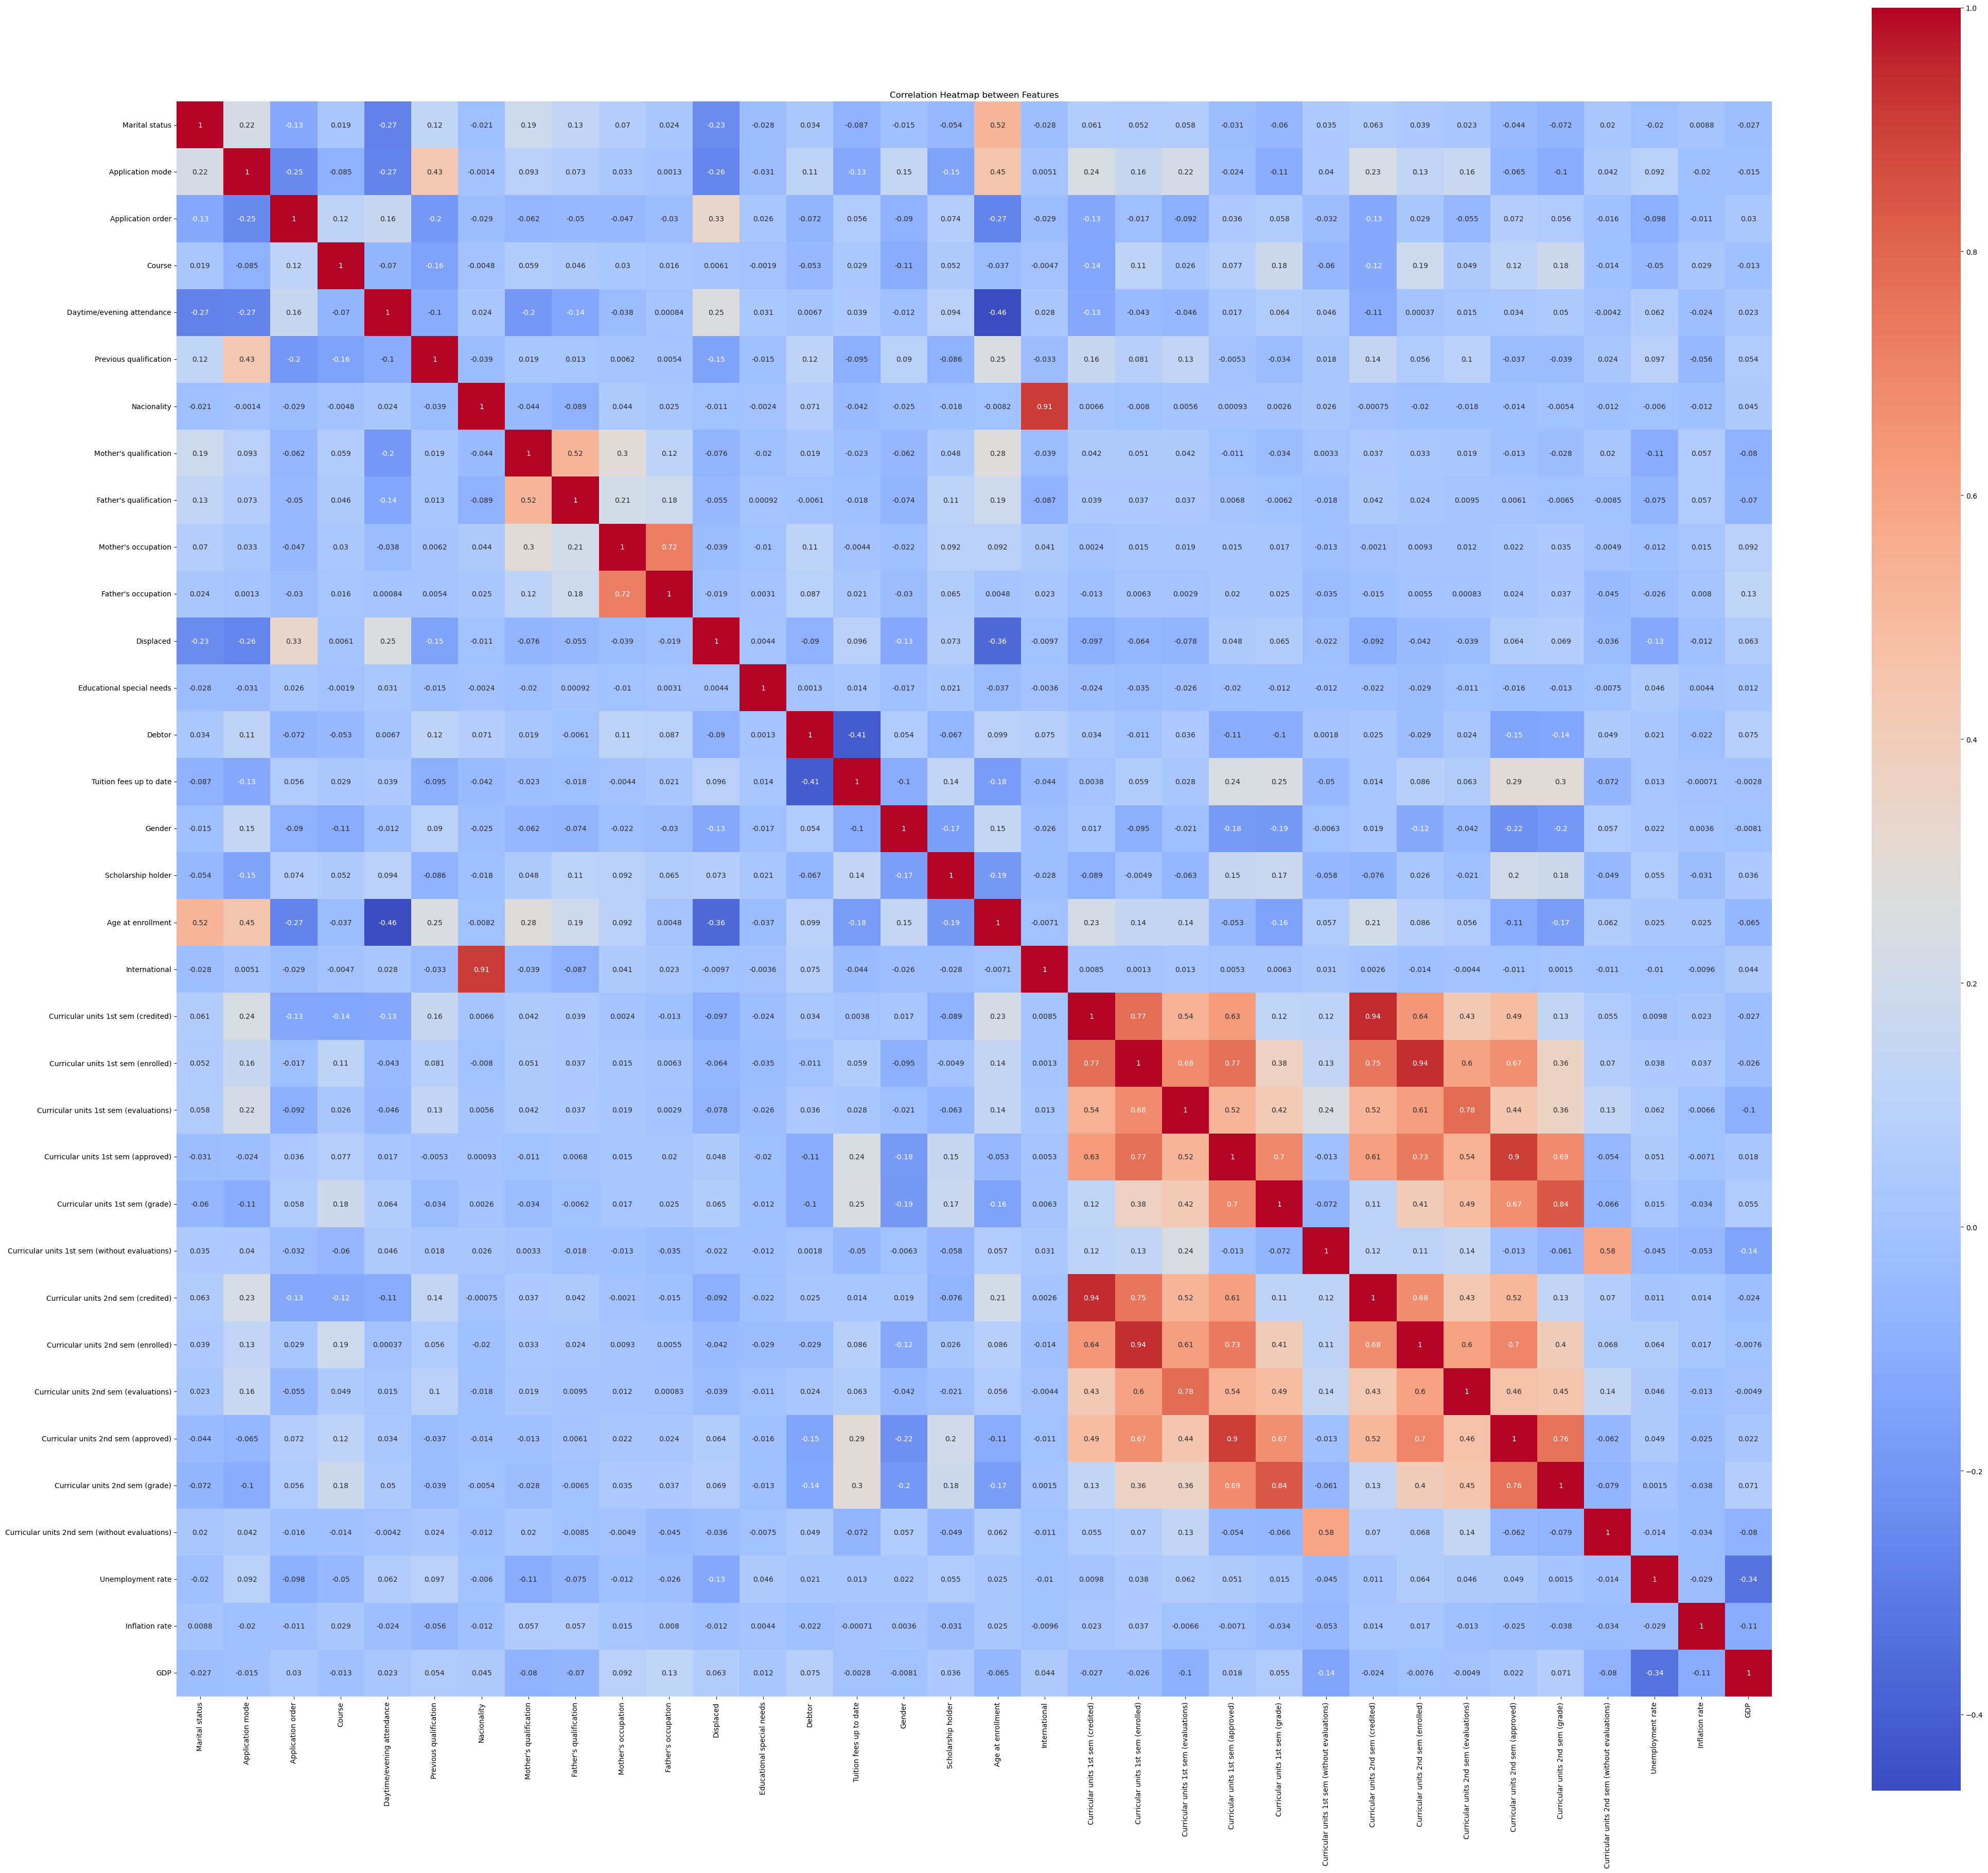

In [10]:
fig, ax = plt.subplots(figsize=(50, 45))
#Drawing the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)
plt.title("Correlation Heatmap between Features")
plt.show()

In [11]:
# Identify highly correlated features (correlation coefficient > 0.5)
threshold = 0.5
high_corr_var = np.where(corr.abs() > threshold)
high_corr_var = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Print the pairs of highly correlated features
high_corr_var

[('Marital status', 'Age at enrollment'),
 ('Nacionality', 'International'),
 ("Mother's qualification", "Father's qualification"),
 ("Mother's occupation", "Father's occupation"),
 ('Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)'),
 ('Curricular units 1st sem (credited)',
  'Curricular units 1st sem (evaluations)'),
 ('Curricular units 1st sem (credited)',
  'Curricular units 1st sem (approved)'),
 ('Curricular units 1st sem (credited)',
  'Curricular units 2nd sem (credited)'),
 ('Curricular units 1st sem (credited)',
  'Curricular units 2nd sem (enrolled)'),
 ('Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)'),
 ('Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (approved)'),
 ('Curricular units 1st sem (enrolled)',
  'Curricular units 2nd sem (credited)'),
 ('Curricular units 1st sem (enrolled)',
  'Curricular units 2nd sem (enrolled)'),
 ('Curricular units 1st sem (enrolled)',
  'Curricular units 2nd s

### Number of Students in each category by Gender

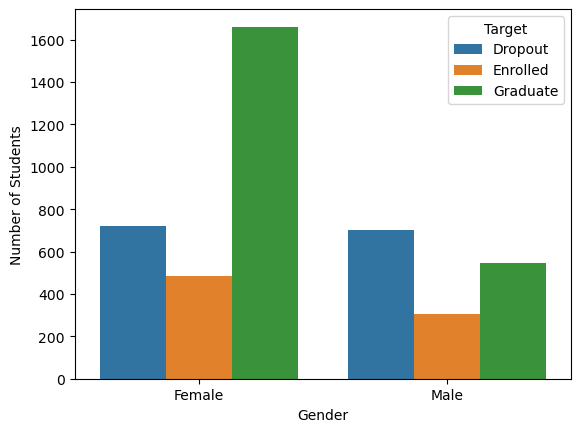

In [12]:
sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

In [13]:
copy_data = data.copy()
copy_data.shape

(4424, 35)

#### Label Encoding

In [14]:
copy_data['Target'] = LabelEncoder().fit_transform(copy_data['Target'])
copy_data.loc[:,'Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

#### Identifying outliers

In [15]:
# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(copy_data))

# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

# Printing the indices of the outliers
outliers

(array([   5,    5,    8, ..., 4420, 4423, 4423], dtype=int64),
 array([17, 30,  6, ..., 18,  6, 18], dtype=int64))

In [16]:
# Dropping the corresponding rows from the dataframe
out_df = copy_data.drop(copy_data.index[outliers[0]])

# Resetting the index of the dataframe
copy_data = out_df.reset_index(drop=True)
copy_data.shape
copy_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,1,1,1,8,1,1,1,3,28,4,...,0,5,8,5,11.600000,0,9.4,-0.8,-3.12,2
3533,1,1,1,5,1,1,1,1,1,10,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,2
3534,1,15,1,5,1,14,1,3,28,4,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,2
3535,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0


In [17]:
# Changing the Target to numerical Value 0 or 1. 
#We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
copy_data.drop(copy_data[copy_data["Target"]==1].index, inplace=True)
copy_data.loc[:,'Target'].value_counts()

2    1791
0    1116
Name: Target, dtype: int64

In [18]:
# mapping integer codes to new values
mapping = {0: 1, 2: 0}
copy_data["Target"] = copy_data["Target"].replace(mapping)
copy_data.loc[:,'Target'].value_counts()

0    1791
1    1116
Name: Target, dtype: int64

In [19]:
X = copy_data.drop('Target', axis=1)
y = copy_data['Target']

#### Standardize features

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Feature Selection - Using RFE

In [21]:
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X_scaled, y)

# Select the important features
X_reduced = X_scaled[:, fit.support_]

#### Train Test Split Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

#### Evaluate the model

In [23]:
# Function to evaluate and plot confusion matrix
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Graduate', 'Graduate'], yticklabels=['Not Graduate', 'Graduate'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('\nClassification Report:')
    print(class_report)

### Initialize and evaluate using Logistic Regeression

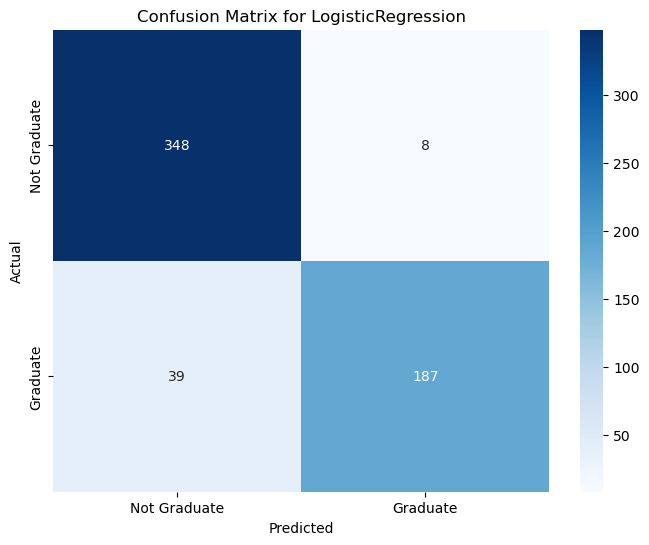

Accuracy: 0.92
Precision: 0.96
Recall: 0.83
F1 Score: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       356
           1       0.96      0.83      0.89       226

    accuracy                           0.92       582
   macro avg       0.93      0.90      0.91       582
weighted avg       0.92      0.92      0.92       582



In [24]:
logistic_reg_model = model.fit(X_train, y_train)
evaluate_model(logistic_reg_model, X_train, X_test, y_train, y_test)

### Initialize and evaluate SVM model

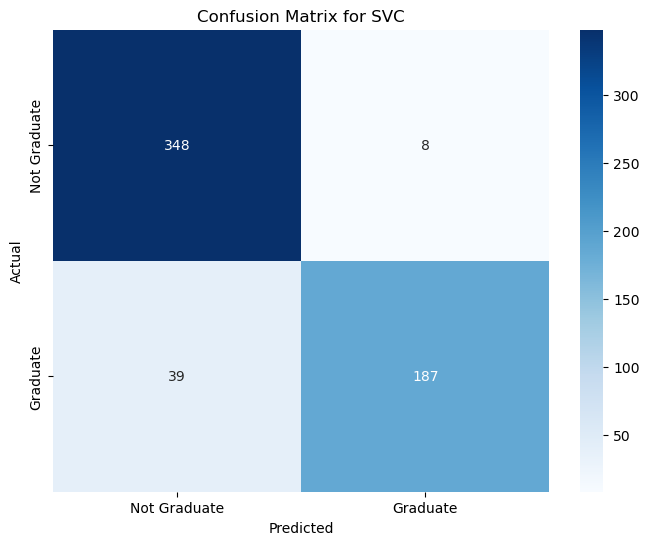

Accuracy: 0.92
Precision: 0.96
Recall: 0.83
F1 Score: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       356
           1       0.96      0.83      0.89       226

    accuracy                           0.92       582
   macro avg       0.93      0.90      0.91       582
weighted avg       0.92      0.92      0.92       582



In [25]:
svm_model = SVC(kernel='linear')
evaluate_model(svm_model, X_train, X_test, y_train, y_test)

### Initialize and evaluate Decision Tree model

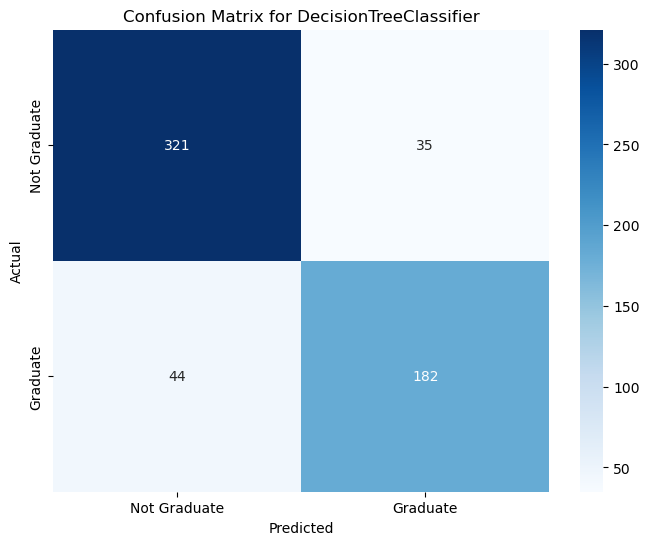

Accuracy: 0.86
Precision: 0.84
Recall: 0.81
F1 Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       356
           1       0.84      0.81      0.82       226

    accuracy                           0.86       582
   macro avg       0.86      0.85      0.86       582
weighted avg       0.86      0.86      0.86       582



In [26]:
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train, X_test, y_train, y_test)

### Initialize and evaluate k-NN model

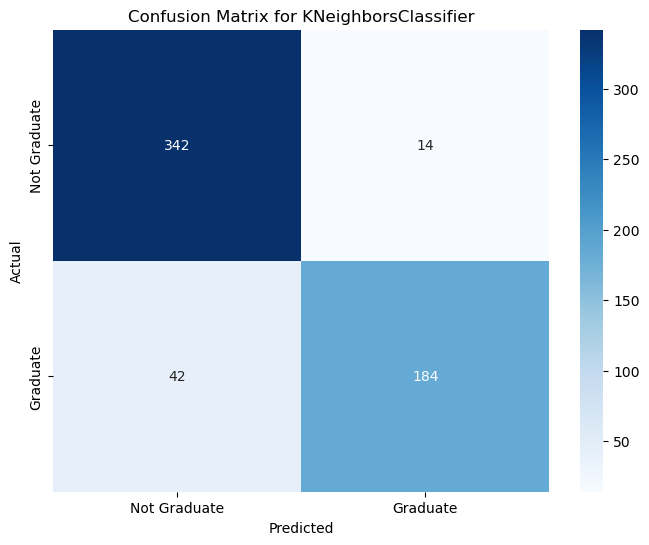

Accuracy: 0.90
Precision: 0.93
Recall: 0.81
F1 Score: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       356
           1       0.93      0.81      0.87       226

    accuracy                           0.90       582
   macro avg       0.91      0.89      0.90       582
weighted avg       0.91      0.90      0.90       582



In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, X_train, X_test, y_train, y_test)